In [64]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping


In [65]:
from tensorflow.keras.datasets import mnist

In [66]:
# (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# X_train = X_train.reshape(60000, 784)
# Y_train = Y_train.reshape(-1, 1)
# X_test = X_test.reshape(10000, 784)
# Y_test = Y_test.reshape(-1, 1)

In [67]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [69]:
print(X_train.shape[0])
print(X_test.shape[0])
print(Y_train.shape[0])
print(Y_test.shape[0])

60000
10000
60000
10000


In [70]:
print(X_train[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [71]:
print(X_test[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [72]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [73]:
print(Y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [74]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [75]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [76]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [58]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200,
                    verbose=1, callbacks=[early_stopping_callback])

In [62]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']
print(y_vloss[0])

# 학습셋의 오차
y_loss = history.history['loss']
print(y_loss[0])

10000/10000 [==============================] - 1s 58us/sample - loss: 0.0660 - accuracy: 0.9834

 Test Accuracy: 0.9834
0.15337664425373077
0.29960612061123054


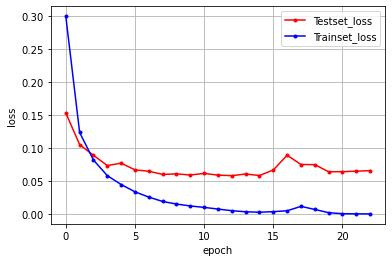

In [77]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [97]:
predict = model.predict(X_test)
predict[0]

array([0.12455357, 0.1179007 , 0.18008082, 0.07625534, 0.07273681,
       0.11336967, 0.05455755, 0.09915365, 0.0573445 , 0.10404745],
      dtype=float32)

In [101]:

np.argmax(predict[0])

2

In [102]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [95]:
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    
    subplot.set_xticks([])
    
    subplot.set_yticks([])
    
    subplot.set_title('predict: %d' %(predict01[i])
                      
    X_test[i] = X_test[i].reshape(28, 28)
    
    subplot.imshow(X_test[i], cmap=plt.cm.binary)

plt.show()

SyntaxError: invalid syntax (<ipython-input-95-7693d5b1e56c>, line 11)